# Dallas Lifespan Bran Study

- https://openneuro.org/datasets/ds004856/versions/1.2.0


# 1. LIBRERÍAS

## Librerias Standar

In [29]:

import numpy as np
import matplotlib.pyplot as plt
import json
from PIL import Image
import pandas as pd
import os
from matplotlib.animation import FuncAnimation
from IPython.display import Video
import cv2
import torch
import torch.nn.functional as F

## Libreria NIBABEL
---
Necesaria para utilizar archivos de NeuroImagen como  MRI, PET, etc.
1. Si no está instalada se puede instalar con PIP
   - pip install nibabel
2. Puede cargar directamente la NeuroImagen de un archivo Comprimido
   - mri = nib.load('archivo.nii.gz')
   

In [2]:
#!pip install nibabel --force-reinstall
!pip show nibabel

import nibabel as nib


Name: nibabel
Version: 5.3.2
Summary: Access a multitude of neuroimaging data formats
Home-page: https://nipy.org/nibabel
Author: 
Author-email: NiBabel developers <neuroimaging@python.org>
License: MIT License
Location: c:\users\juanr\.conda\envs\torch\lib\site-packages
Requires: importlib-resources, numpy, packaging, typing-extensions
Required-by: nilearn, torchio


## Paths y Parámetros

In [3]:
PATH_BASE = './'
print('Archivos en el Directorio Base')
for file in os.listdir(PATH_BASE):
    print(file)

Archivos en el Directorio Base
Construct5_Reasoning.xlsx
participants.txt
sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.json
sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii
sub-1003_ses-wave1_task-Hypercapnia_run-1_bold.nii
DallasLifespanBranStudy.ipynb
.ipynb_checkpoints
Construct4_EpisodicMemory.xlsx
Construct2_WorkingMemory.xlsx
Construct1_SpeedOfProcessing.xlsx
Construct7_VerbalFluency.xlsx
Construct6_Vocabulary.xlsx
sub-1003_ses-wave1_acq-DTI_run-1_dwi.nii.gz
sub-1003_ses-wave1_trc-18FAV45_run-1_pet.nii.gz
sub-1003_ses-wave1_acq-ASL_run-1_asl.nii.gz
sub-1003_ses-wave1_task-Hypercapnia_run-1_bold.nii.gz
sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii.gz
video_output.mp4
MachineLearning_TFM.ipynb
EDA_TFM.ipynb
DatosCompletos.csv
MachineLearning_TFM2.ipynb
MachineLearning_TFM3.ipynb
ML_TFM_v1.ipynb
ds004856-1.2.0.sh
DL_Dataset.ipynb
muinar06_act1_individual.ipynb
Untitled.ipynb
sub-1003_ses-wave1_sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii_MNI.nii.gz
mni_template.nii.gz
TFM_v3.docx
Prep_DL_v3.ipynb
DL

# 2. EDA

## Analisis del archivo de Participantes
---
1. Formato TSV (Valores Separados por tabulador)
2. Se carga como un CSV indicando que el separador es '\t'

In [4]:
# Ruta al archivo de Participantes
path_participants = os.path.join(PATH_BASE, 'participants.txt')

df = pd.read_csv(path_participants, sep='\t')

print("Información del DataFrame:")
df.info()

print("\nPrimeras 5 filas del DataFrame:")
print(df.head())

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   participant_id   464 non-null    object 
 1   AgeCog_W1        464 non-null    int64  
 2   AgeMRI_W1        464 non-null    int64  
 3   AgePETAmy_W1     295 non-null    float64
 4   AgeCog_W2        337 non-null    float64
 5   AgeMRI_W2        300 non-null    float64
 6   AgePETAmy_W2     180 non-null    float64
 7   AgePETTau_W2     60 non-null     float64
 8   AgeCog_W3        215 non-null    float64
 9   AgeMRI_W3        193 non-null    float64
 10  AgePETAmy_W3     76 non-null     float64
 11  AgePETTau_W3     124 non-null    float64
 12  Sex              464 non-null    object 
 13  Race             464 non-null    int64  
 14  Ethnicity        462 non-null    float64
 15  EduYrsEstCap     463 non-null    float64
 16  EduComp          463 non-null    fl

## Analisis de archivo Resultados de los Test Psicologicos
---
1. Formato Excel en archivos con extensión .xlsx
2. Se cargan igual que los CSV pero con la función pd.read_excel()

In [5]:
# Filtra archivos con extensión .xlsx
archivos_xlsx = [f for f in os.listdir(PATH_BASE) if f.endswith('.xlsx')]

# Diccionario para guardar los DataFrames con nombre del archivo como clave
datos_test = {}

for archivo in archivos_xlsx:
    ruta_completa = os.path.join(PATH_BASE, archivo)
    df = pd.read_excel(ruta_completa, engine='openpyxl', sheet_name = None)
    datos_test[archivo.split('.')[0]] = {}
    for i, (hoja, df_hoja) in enumerate (df.items()): 
         df_hoja["hoja"] = i+1 
         datos_test[archivo.split('.')[0]][hoja] = df_hoja
        
# Mostrar resumen de los archivos leídos
for nombre, df in datos_test.items():
    for hoja, df_hoja in df.items(): 
        print(f"Archivo: {nombre}----{hoja}, Tamaño: {df_hoja.shape}")

print(datos_test['Construct5_Reasoning']['Reasoning-w1'].info()) 

Archivo: Construct5_Reasoning----Reasoning-w1, Tamaño: (464, 55)
Archivo: Construct5_Reasoning----Reasoning-w2, Tamaño: (464, 55)
Archivo: Construct5_Reasoning----Reasoning-w3, Tamaño: (464, 55)
Archivo: Construct4_EpisodicMemory----Episodic Memory-W1, Tamaño: (464, 56)
Archivo: Construct4_EpisodicMemory----Episodic Memory-W2, Tamaño: (464, 56)
Archivo: Construct4_EpisodicMemory----Episodic Memory-W3, Tamaño: (464, 56)
Archivo: Construct2_WorkingMemory----WorkingMemory_W1, Tamaño: (464, 61)
Archivo: Construct2_WorkingMemory----WorkingMemory_W2, Tamaño: (464, 61)
Archivo: Construct2_WorkingMemory----WorkingMemory_W3, Tamaño: (464, 61)
Archivo: Construct1_SpeedOfProcessing----Speed of Processing-W1, Tamaño: (464, 41)
Archivo: Construct1_SpeedOfProcessing----Speed of Processing-W2, Tamaño: (464, 41)
Archivo: Construct1_SpeedOfProcessing----Speed of Processing-W3, Tamaño: (464, 41)
Archivo: Construct7_VerbalFluency----Verbal Fluency-W1, Tamaño: (464, 36)
Archivo: Construct7_VerbalFluency--

In [6]:
dfs_etiquetados = []
for j, (nombre, df_file) in enumerate (datos_test.items()):
    sufijo_j = f"A{j+1}"
    df_unido = pd.concat( [df_hoja for k, (_, df_hoja) in enumerate(df_file.items())],
    ignore_index=True
    ) 
       
        
    df_mod = df_unido.copy()

    nuevas_columnas = [
        col if (col == "S#" or col == "hoja") else f"{col}_{sufijo_j}" for col in df_mod.columns 
    ]
    df_mod.columns = nuevas_columnas
    
    dfs_etiquetados.append(df_mod)
    
    
#Concatenar horizontalmente por columnas (asumiendo que 'S#' es la clave común)
df_final = dfs_etiquetados[0]
for df in dfs_etiquetados[1:]:
    df_final = pd.merge(df_final, df, on=["S#", "hoja"], how="outer")

df_final["target"] = df_final["MMSE_A1"].replace("xx", np.nan)
df_final = df_final.dropna(subset = ["target"])
df_final["target"] = df_final["target"].astype(int) 
df_final.to_csv("DatosCompletos.csv", index = False) 

print(df_final.head())
print(df_final.shape)

C:\Users\juanr\AppData\Local\Temp\ipykernel_18772\2971276135.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final["target"] = df_final["MMSE_A1"].replace("xx", np.nan)


   S# AgeInterval_A1 Sex_A1 Race_A1 Ethnicity_A1 HandednessScore_A1 MMSE_A1  \
0  12          53-55      f       5          0.0              3.273    30.0   
1  12          59-61      f       5            0                 xx      30   
2  12          65-67      f       5          NaN                 xx      30   
3  21          71-73      f       5          0.0              3.909    29.0   
6  49          68-70      f       5          0.0              3.636    27.0   

  CogW1toW2_A1 CogW2toW3_A1 CogW1toW3_A1  ... NIHOralReadFully27_A6 Task28_A6  \
0     4.375086     6.272416    10.647502  ...                   NaN         3   
1     4.375086     6.272416    10.647502  ...                117.43         2   
2     4.375086     6.272416    10.647502  ...                    57         1   
3          NaN          NaN          NaN  ...                   NaN         3   
6     4.566735     5.615332    10.182067  ...                   NaN         3   

  NIHPicVocabTheta28_A6 NIHPicVocabSE2

In [7]:
mmse_cols = [col for col in df_final.columns if col.startswith("MMSE")]

# Extraer el sub-DataFrame MMSE
df_mmse = df_final[mmse_cols]

# Paso 1: filtrar solo los valores no-nulos por fila
# Paso 2: contar cuántos valores únicos no-nulos tiene cada fila
# Si hay 0 (todos NaN) o 1 (todos iguales), está OK
num_valores_distintos = df_mmse.apply(lambda row: row.dropna().nunique(), axis=1)

# Criterio: filas con 0 o 1 valores únicos no-nulos
mmse_ok = num_valores_distintos <= 1

#print( num_valores_distintos)
#print(mmse_ok.info())
# Filas que no cumplen
#df_inconsistente = df[~mmse_ok]
inconsistente = (mmse_ok == False).sum()

print(f"Filas con valores MMSE inconsistentes: {inconsistente}")


❌ Filas con valores MMSE inconsistentes: 0


### Analisis del archivo de Test de Razonamiento:  
---
1. Archivo:  Construct5_Reasoning.xlsx
   

In [8]:
def analisis_filetest(df):
    print("Dimensiones del DataFrame:", df.shape)
    print("\nPrimeras filas del DataFrame:")
    print(df.head())
    print("\nInformación general:")
    df.info()
    print("\nEstadísticas descriptivas:")
    print(df.describe())
    print("\nValores nulos por columna:")
    print(df.isnull().sum())

In [9]:
analisis_filetest(datos_test['Construct5_Reasoning']['Reasoning-w1'])

Dimensiones del DataFrame: (464, 55)

Primeras filas del DataFrame:
   S# AgeInterval Sex  Race  Ethnicity  HandednessScore  MMSE  CogW1toW2  \
0  12       53-55   f     5        0.0            3.273  30.0   4.375086   
1  21       71-73   f     5        0.0            3.909  29.0        NaN   
2  49       68-70   f     5        0.0            3.636  27.0   4.566735   
3  61       53-55   f     2        0.0              NaN  30.0   4.123203   
4  80       38-40   m     5        0.0            3.545  28.0   4.227242   

   CogW2toW3  CogW1toW3  ...  CantabSOCIntialTime3_22  \
0   6.272416  10.647502  ...                   2516.0   
1        NaN        NaN  ...                   5209.0   
2   5.615332  10.182067  ...                  12539.0   
3        NaN        NaN  ...                   4871.0   
4        NaN        NaN  ...                   6005.5   

   CantabSOCIntialTime4_22  CantabSOCIntialTime5_22  \
0                  2640.75                  9131.75   
1                  192

### Analisis del archivo de Test de Vocabulario:  
---
1. Archivo:  Construct6_Vocabulary.xlsx
   

In [10]:
analisis_filetest(datos_test['Construct6_Vocabulary']['Vocabulary-W1'])

Dimensiones del DataFrame: (464, 47)

Primeras filas del DataFrame:
   S# AgeInterval Sex  Race  Ethnicity  HandednessScore  MMSE  CogW1toW2  \
0  12       53-55   f     5        0.0            3.273  30.0   4.375086   
1  21       71-73   f     5        0.0            3.909  29.0        NaN   
2  49       68-70   f     5        0.0            3.636  27.0   4.566735   
3  61       53-55   f     2        0.0              NaN  30.0   4.123203   
4  80       38-40   m     5        0.0            3.545  28.0   4.227242   

   CogW2toW3  CogW1toW3  ...  NIHOralReadPercent27  NIHOralReadFully27  \
0   6.272416  10.647502  ...                   NaN                 NaN   
1        NaN        NaN  ...                   NaN                 NaN   
2   5.615332  10.182067  ...                   NaN                 NaN   
3        NaN        NaN  ...                   NaN                 NaN   
4        NaN        NaN  ...                   NaN                 NaN   

   Task28  NIHPicVocabTheta28 

Analisis Velocidad de Procesamiento
--

In [11]:
analisis_filetest(datos_test['Construct1_SpeedOfProcessing']['Speed of Processing-W1'])


Dimensiones del DataFrame: (464, 41)

Primeras filas del DataFrame:
   S# AgeInterval Sex  Race  Ethnicity  HandednessScore  MMSE  CogW1toW2  \
0  12       53-55   f     5        0.0            3.273  30.0   4.375086   
1  21       71-73   f     5        0.0            3.909  29.0        NaN   
2  49       68-70   f     5        0.0            3.636  27.0   4.566735   
3  61       53-55   f     2        0.0              NaN  30.0   4.123203   
4  80       38-40   m     5        0.0            3.545  28.0   4.227242   

   CogW2toW3  CogW1toW3  ...  Task2  DigSymTotal2  Task3  NIHSpeedRaw3  \
0   6.272416  10.647502  ...      1          57.0      3           NaN   
1        NaN        NaN  ...      1          54.0      3           NaN   
2   5.615332  10.182067  ...      1          46.0      3           NaN   
3        NaN        NaN  ...      1          71.0      3           NaN   
4        NaN        NaN  ...      1          51.0      3           NaN   

   NIHSpeedComp3  NIHSpeedUn3 

Analisis Working Memory 
-- 

In [12]:
analisis_filetest(datos_test['Construct2_WorkingMemory']['WorkingMemory_W1'])


Dimensiones del DataFrame: (464, 61)

Primeras filas del DataFrame:
   S# AgeInterval Sex  Race  Ethnicity  HandednessScore  MMSE  CogW1toW2  \
0  12       53-55   f     5        0.0            3.273  30.0   4.375086   
1  21       71-73   f     5        0.0            3.909  29.0        NaN   
2  49       68-70   f     5        0.0            3.636  27.0   4.566735   
3  61       53-55   f     2        0.0              NaN  30.0   4.123203   
4  80       38-40   m     5        0.0            3.545  28.0   4.227242   

   CogW2toW3  CogW1toW3  ...  NIHTBLstSrtFCrrctdTscore7  Task8  DMSSimTot8  \
0   6.272416  10.647502  ...                        NaN      1        10.0   
1        NaN        NaN  ...                        NaN      1         9.0   
2   5.615332  10.182067  ...                        NaN      1        10.0   
3        NaN        NaN  ...                        NaN      1        10.0   
4        NaN        NaN  ...                        NaN      1        10.0   

   DMS

Analisis Episodic Memory 
-- 

In [13]:
analisis_filetest(datos_test['Construct4_EpisodicMemory']['Episodic Memory-W2'])

Dimensiones del DataFrame: (464, 56)

Primeras filas del DataFrame:
   S# AgeInterval Sex Race Ethnicity HandednessScore MMSE  CogW1toW2  \
0  12       59-61   f    5         0              xx   30   4.375086   
1  49       71-73   f    5         0              xx   30   4.566735   
2  61       56-58   f    2         0              xx   29   4.123203   
3  80       44-46   m    5         0              xx   30   4.227242   
4  81       44-46   f    5         0              xx   29   5.286790   

   CogW2toW3  CogW1toW3  ...  LmStoryBDelay18  LmStoryDelay18  Task19  \
0   6.272416  10.647502  ...               19              39       1   
1   5.615332  10.182067  ...                8              15       2   
2        NaN        NaN  ...               12              23       1   
3        NaN        NaN  ...               18              31       2   
4        NaN        NaN  ...               19              40       1   

   NIHPicSeqRaw19  NIHPicSeqComp19  NIHPicSeqUn19  NIHPicSeq

Analisis Verbal Fluency 
-- 

In [14]:
analisis_filetest(datos_test['Construct7_VerbalFluency']['Verbal Fluency-W3'])


Dimensiones del DataFrame: (464, 36)

Primeras filas del DataFrame:
    S# AgeInterval Sex Race Ethnicity  HandednessScore MMSE CogW1toW2  \
0   12       65-67   f    5          0              xx   30  4.375086   
1   49       77-79   f    5          0              xx   30  4.566735   
2   92       62-64   m    5          0              xx   30  4.353183   
3  103       50-52   f    5          0              xx   30  4.394251   
4  138       38-40   f    6          1              xx   30  4.208077   

  CogW2toW3  CogW1toW3  ... Task29 ContOralAssocF29 ContOralAssocA29  \
0  6.272416  10.647502  ...      1                9                5   
1  5.615332  10.182067  ...      1               17               15   
2  5.785079  10.138261  ...      1               16               20   
3  5.861739  10.255989  ...      1               12               10   
4  6.154689  10.362765  ...      1               19               15   

  ContOralAssocS29 ContOralAssocTot29 Task30 ContOralAssocCa

## Análisis del target 
---

<class 'pandas.core.series.Series'>
Index: 1006 entries, 0 to 1391
Series name: MMSE_A1
Non-Null Count  Dtype
--------------  -----
1006 non-null   int32
dtypes: int32(1)
memory usage: 11.8 KB
None


(array([  2.,   9.,   0.,  57.,   0., 120., 168.,   0., 269., 381.]),
 array([24. , 24.6, 25.2, 25.8, 26.4, 27. , 27.6, 28.2, 28.8, 29.4, 30. ]),
 <BarContainer object of 10 artists>)

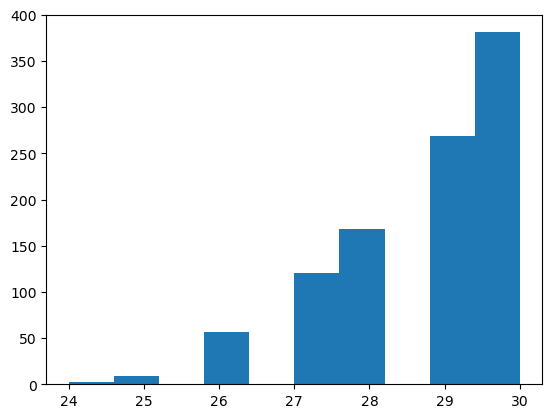

In [15]:
target = df_final["MMSE_A1"].replace("xx", np.nan).dropna().astype(int)
print(target.info())
plt.hist(target) 


ANALISIS DE FEATURES 
--

In [16]:
#####################################################
##########   PLOT FEATURE HISTOGRAM AND SHOW STATISTICS
#####################################################

def plot_Histogram(datos, feature_name, target, BINS = 50):
    
    minimo = datos[feature_name].min()
    maximo = datos[feature_name].max()
    bins = np.linspace(np.min(minimo), np.min(maximo), BINS)  
    
    print('\nFeature:\t',feature_name,'\n',
              '\n\t\tMIN = ', np.min(datos[feature_name]), '\tMAX = ', np.max(datos[feature_name]), 
              '\n\t\tMEAN = ', np.mean(datos[feature_name]), '\tSTD = ', np.mean(datos[feature_name]), 
              '\n\t\tNaN = ', np.sum(datos[feature_name]) )

    clases = np.linspace(24, 30, 7).astype(int) 
    datos["target"] = target 
    for clase in clases:
        df_clase = datos[datos["target"] == clase ][feature_name] 
        
        print('\nClass:\t',clase,
              '\n\t\tMIN = ', df_clase.min(), '\tMAX = ', df_clase.max(), 
              '\n\t\tMEAN = ', df_clase.mean(), '\tSTD = ', df_clase.std(), )
        df_clase = np.nan_to_num(df_clase, nan=0)
        plt.hist(df_clase, bins = bins, label = ''.join(['Class ',str(clase)]), alpha = 0.4)
    
    plt.title(feature_name)
    plt.legend()
    plt.show()


Feature:	 ETSVocab24 
 
		MIN =  4.25 	MAX =  36.0 
		MEAN =  18.829373650107993 	STD =  18.829373650107993 
		NaN =  8718.0

Class:	 24 
		MIN =  nan 	MAX =  nan 
		MEAN =  nan 	STD =  nan

Class:	 25 
		MIN =  13.25 	MAX =  15.0 
		MEAN =  14.166666666666666 	STD =  0.8779711460710616

Class:	 26 
		MIN =  5.25 	MAX =  32.5 
		MEAN =  20.07608695652174 	STD =  6.765737035124739

Class:	 27 
		MIN =  7.75 	MAX =  33.5 
		MEAN =  20.164634146341463 	STD =  6.435645304692054

Class:	 28 
		MIN =  4.5 	MAX =  33.5 
		MEAN =  17.48469387755102 	STD =  6.856491784567144

Class:	 29 
		MIN =  4.25 	MAX =  34.75 
		MEAN =  19.134831460674157 	STD =  7.170018877932475

Class:	 30 
		MIN =  4.25 	MAX =  36.0 
		MEAN =  18.882450331125828 	STD =  7.2088954278157775


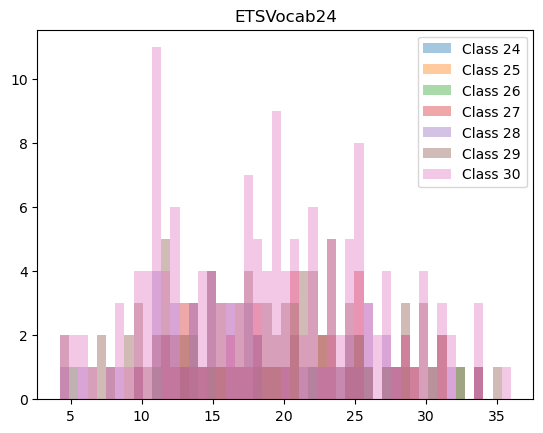

In [17]:
plot_Histogram(datos_test['Construct6_Vocabulary']['Vocabulary-W1'], "ETSVocab24", target, BINS = 50)

## Analisis de un archivo JSON asociado a una NeuroImagen
---
1. Se carga con la libreria JSON utilizand json.load()
2. Al cargarlo se obtiene un objeto de tipo dict (Diccionario) con pares de  (key, values)
3. Muestra información de la máquina en la que se ha realizado el scanner

In [18]:
# 📂 Ruta al archivo .json
json_file_path = 'sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.json'

# 📖 Leer el archivo JSON
with open(json_file_path, 'r') as f:
    metadata = json.load(f)

# 📋 Mostrar los metadatos
for key, value in metadata.items():
    print(f"{key}: {value}")

Manufacturer: Philips
PatientPosition: HFS
SeriesDescription: ImageMRSERIES
ProtocolName: T2W_FLAIR642.5nogapSENSE
SeriesNumber: 14
AcquisitionNumber: 14
ImageComments: HippoHC
PhilipsRescaleSlope: 7.17411
PhilipsRescaleIntercept: 0
PhilipsScaleSlope: 0.0189285
UsePhilipsFloatNotDisplayScaling: 1
EchoTime: 0.125
RepetitionTime: 11
InversionTime: 2.8
ImageOrientationPatientDICOM: [0.998709, -0.00403057, -0.050637, -0.00174308, 0.993541, -0.113462]
ConversionSoftware: dcm2niix
ConversionSoftwareVersion: v1.0.20220720


## Analisis de las imagenes MRI
---
1. Se carga directamente el archivo comprimido con extension .nii.gz
2. El archivo contiene Metadatados almacenados en img.header
3. Los datos de la neuroimagen se convierten en Numpy para analizarlos y visualizarlos

In [19]:

# Filtra archivos con extensión .nii.gz
archivos_nii = [f for f in os.listdir(PATH_BASE) if f.endswith('.nii.gz')]
for archivo in archivos_nii:
    print(archivo)


sub-1003_ses-wave1_acq-DTI_run-1_dwi.nii.gz
sub-1003_ses-wave1_trc-18FAV45_run-1_pet.nii.gz
sub-1003_ses-wave1_acq-ASL_run-1_asl.nii.gz
sub-1003_ses-wave1_task-Hypercapnia_run-1_bold.nii.gz
sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii.gz
sub-1003_ses-wave1_sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii_MNI.nii.gz
mni_template.nii.gz
gradcam_diff_map.nii.gz


In [20]:
def process_nii(file_nii):
    # Cargar el archivo .nii
    img = nib.load(file_nii)
    # Obtener los datos de la imagen en un array NumPy
    data = img.get_fdata()
    # Explorar la forma de los datos
    print("\nDimensiones del archivo NIfTI:", data.shape, '\n')
    # Obtener la cabecera del archivo NIfTI
    header = img.header
    print(header)
    return data

### Analisis del archivo clasificado como 'anat'
---
1. Es un archivo RMI de 3 Dimensiones --> (ANCHURA x ALTURA x PRODUNDIDAD) 64 Imagenes de tamaño 512 x 512 Monócromas
3. Para visualizar una imagen se selecciona de la tercera dimension del array... por ejemplo data[:,:,0] sería la primera

In [23]:
anat_data_raw = process_nii('sub-1003_ses-wave1_acq-FLAIR_run-1_T2w.nii.gz')


Dimensiones del archivo NIfTI: (512, 512, 64) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512  64   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     0.449  0.449  2.5   11.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'Time=0.000'
aux_file        : b'HippoHC'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.00057298504
quatern_c       : 0.99806076
quatern_d       : 0.05682655

sub-12_ses-wave1_acq-FLAIR_run-1_T2w.nii.gz --> Shape: torch.Size([1, 1, 512, 512, 24])


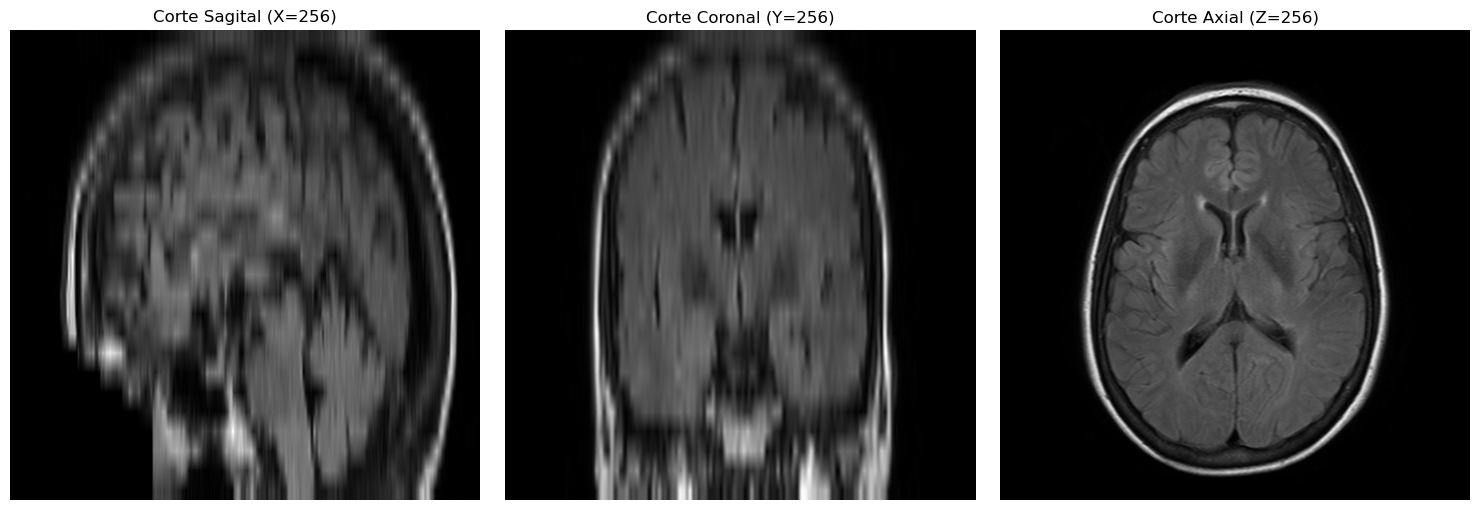

sub-12_ses-wave1_acq-MPRAGE_run-1_T1w.nii.gz --> Shape: torch.Size([1, 1, 256, 256, 160])


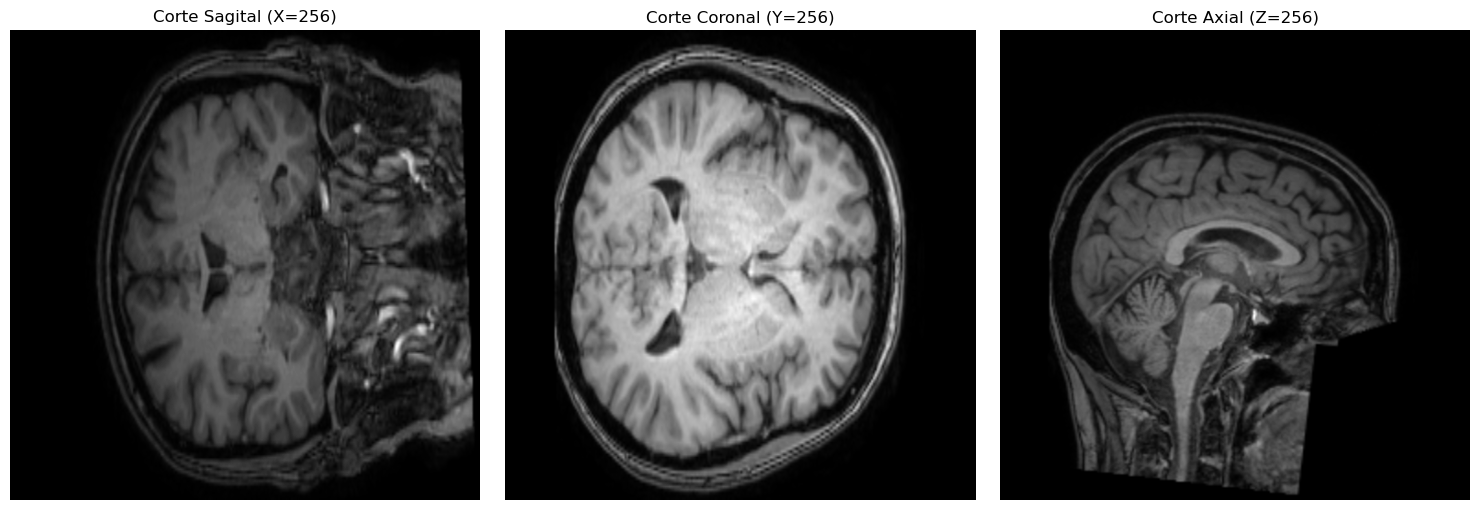

sub-1003_ses-wave2_task-VentralVisual_run-2_bold.nii.gz --> Shape: torch.Size([1, 1, 64, 64, 43, 202])


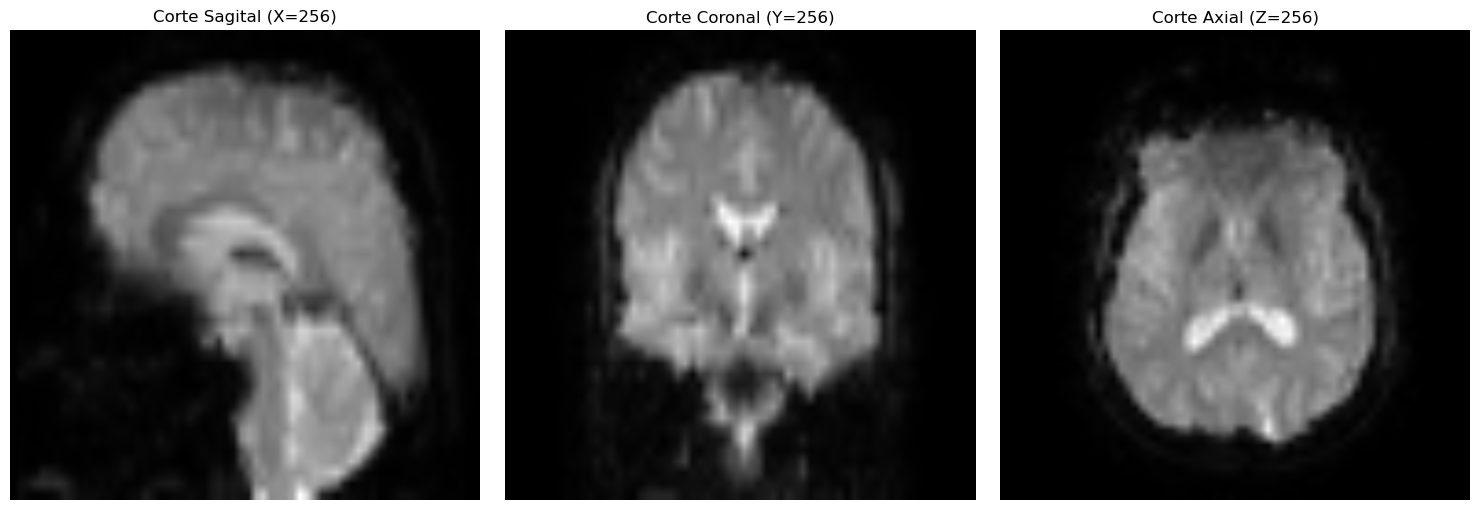

sub-1003_ses-wave1_trc-18FAV45_run-1_pet.nii.gz --> Shape: torch.Size([1, 1, 128, 128, 63])


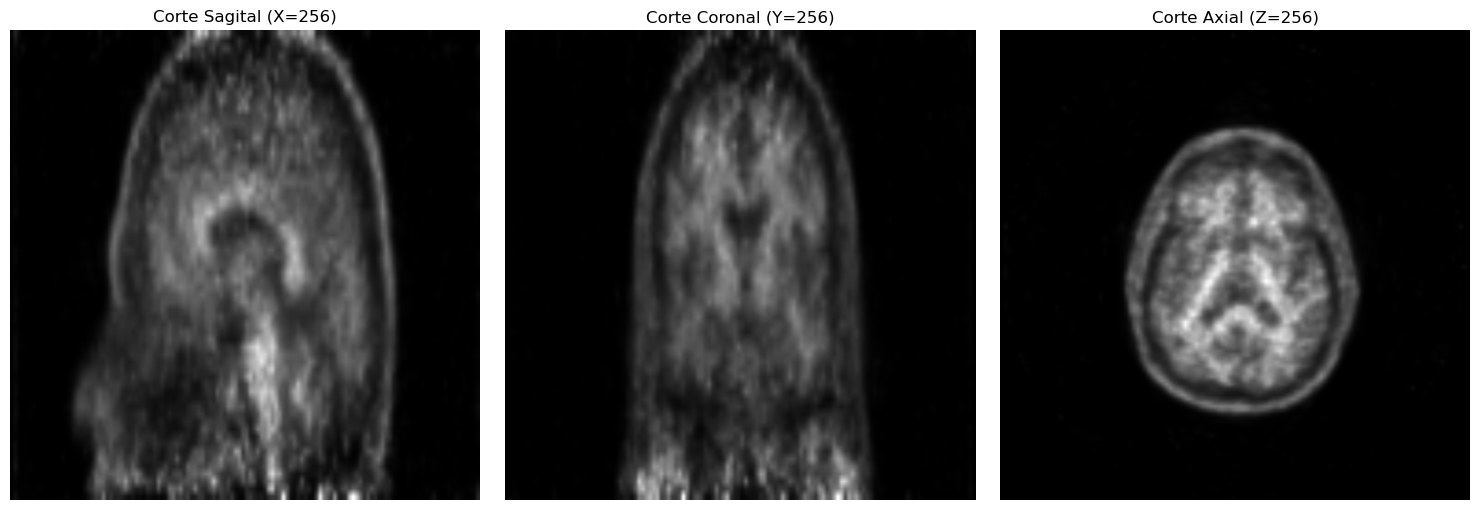

sub-1003_ses-wave2_acq-DTI_run-1_dwi.nii.gz --> Shape: torch.Size([1, 1, 128, 128, 50, 31])


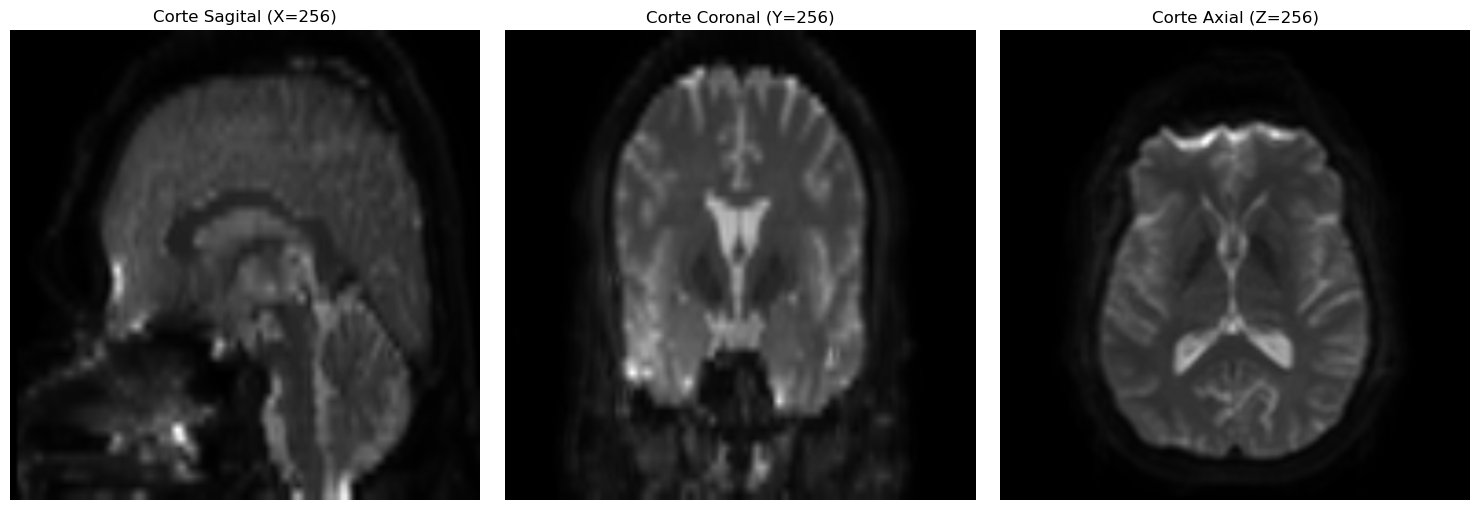

sub-12_ses-wave1_acq-ASL_run-1_asl.nii.gz --> Shape: torch.Size([1, 1, 80, 80, 27, 60])


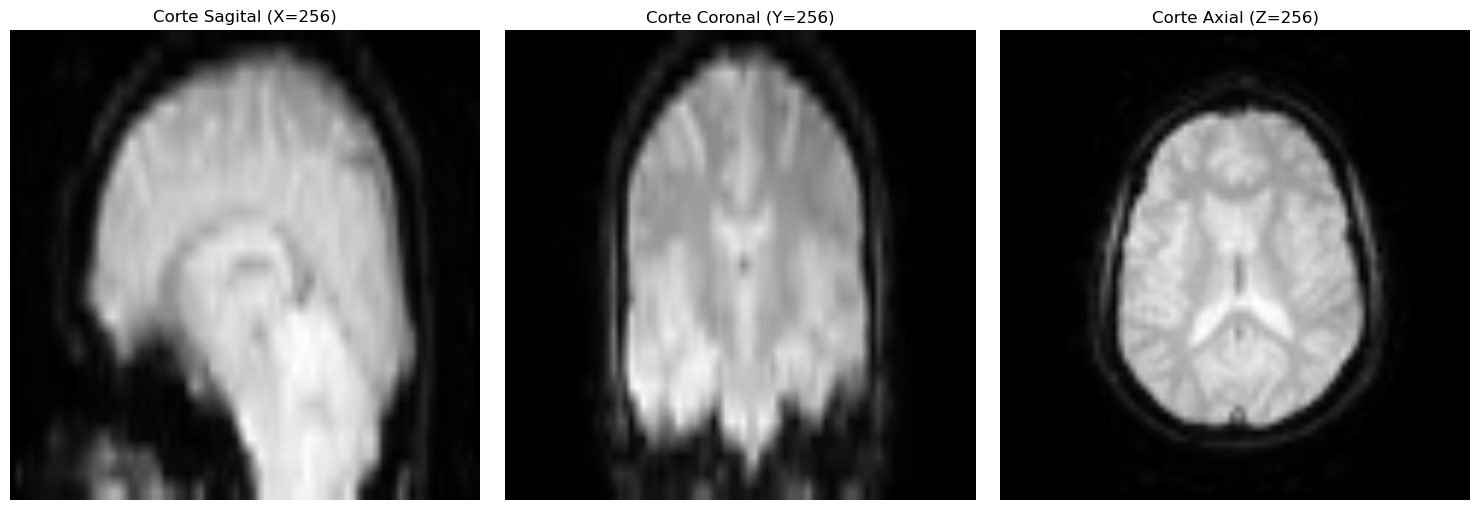

In [39]:
def show_3D(file_nii):
    # Cargar el archivo .nii
    img = nib.load(file_nii)
    # Obtener los datos de la imagen en un array NumPy
    anat_data_raw = img.get_fdata()
    anat_tensor = torch.tensor(anat_data_raw, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    print(file_nii, '--> Shape:', anat_tensor.shape)
    if len(anat_tensor.shape)==6:
        anat_tensor =anat_tensor[:,:,:,:,:,0]
    # Interpolación a (512, 512, 512)
    anat_resized = F.interpolate(
        anat_tensor, size=(512, 512, 512),
        mode='trilinear',
        align_corners=False
    )
    
    # Convertir de nuevo a NumPy (3D)
    anat_data = anat_resized.squeeze().cpu().numpy()
    
    # Calcular los cortes centrales
    center_x = anat_data.shape[0] // 2  # Sagital (eje X)
    center_y = anat_data.shape[1] // 2  # Coronal (eje Y)
    center_z = anat_data.shape[2] // 2  # Axial (eje Z)
    
    # Crear figura
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Sagital (eje X: corte en plano yz)
    axes[0].imshow(np.rot90(anat_data[center_x, :, :], k=3), cmap="gray", origin="lower")
    axes[0].set_title(f'Corte Sagital (X={center_x})')
    axes[0].axis("off")
    
    # Coronal (eje Y: corte en plano xz)
    axes[1].imshow(np.rot90(anat_data[:, center_y, :], k = 3), cmap="gray", origin="lower")
    axes[1].set_title(f'Corte Coronal (Y={center_y})')
    axes[1].axis("off")
    
    # Axial (eje Z: corte en plano xy)
    axes[2].imshow(np.rot90(anat_data[:, :, center_z], k=3), cmap="gray", origin="lower")
    axes[2].set_title(f'Corte Axial (Z={center_z})')
    axes[2].axis("off")
    
    plt.tight_layout()
    plt.show()

show_3D('sub-12_ses-wave1_acq-FLAIR_run-1_T2w.nii.gz')
show_3D('sub-12_ses-wave1_acq-MPRAGE_run-1_T1w.nii.gz')
show_3D('sub-1003_ses-wave2_task-VentralVisual_run-2_bold.nii.gz')
show_3D('sub-1003_ses-wave1_trc-18FAV45_run-1_pet.nii.gz')
show_3D('sub-1003_ses-wave2_acq-DTI_run-1_dwi.nii.gz')
show_3D('sub-12_ses-wave1_acq-ASL_run-1_asl.nii.gz')

### Analisis del archivo sub-1003_ses-wave1_task-Hypercapnia_run-1_bold.nii.gz
---
1. Es un archivo fRMI --> RMI Funcional
2. Este archivo de Datos tiene 4 dimensiones --> (ANCHURA x ALTURA x PROFUNDIDAD x TIEMPO)
3. PROFUNDIDAD indica el número de imagenes tomados en cada instante
4. TIEMPO el número de muestras temporales tomadas. El archivo contiene los MRI tomados a lo largo del tiempo.
5. Para visualizar una imagen se selecciona de la tercera y cuarta dimension del array... por ejemplo data[:,:,0,0] sería la primera imagen del instante inicial

In [15]:
func_nii = process_nii('sub-1003_ses-wave1_task-Hypercapnia_run-1_bold.nii.gz')


Dimensiones del archivo NIfTI: (64, 64, 43, 211) 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'r')
dim_info        : 0
dim             : [  4  64  64  43 211   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.     3.438  3.438  3.5    2.     0.     0.     0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'Time=0.000')
aux_file        : np.bytes_(b'HippoHC')
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.01589304
q

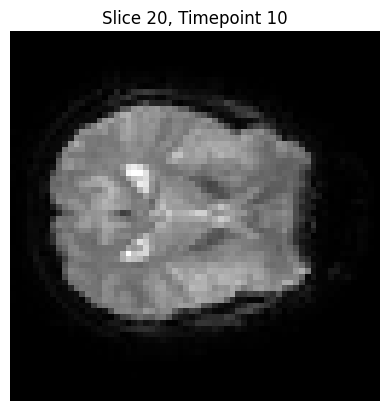

In [17]:
if len(func_nii.shape)==4:
    slice_index = 20
    timepoint = 10  # Cambiar el índice según el frame que quieras ver
    plt.imshow(func_nii[:, :, slice_index, timepoint], cmap="gray")
    plt.title(f"Slice {slice_index}, Timepoint {timepoint}")
    plt.axis("off")
    plt.show()

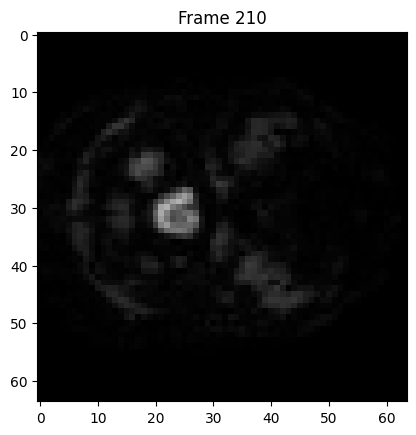

In [18]:
# Crear la figura
fig, ax = plt.subplots()
img = ax.imshow(func_nii[:, :, 0, 0], cmap='gray', vmin=func_nii.min(), vmax=func_nii.max())
ax.set_title('Frame 0')

# Función para actualizar cada frame
def update(t):
    img.set_data(func_nii[:, :,0, t])
    ax.set_title(f"Frame {t}")
    return [img]

# Crear la animación
anim = FuncAnimation(fig, update, frames=func_nii.shape[3], interval=100, blit=True)

# Mostrar en Jupyter Notebook
from IPython.display import HTML
HTML(anim.to_jshtml())

In [19]:
def normalizar_frame(frame):
    frame_norm = frame - np.min(frame)
    frame_norm /= np.max(frame_norm) if np.max(frame_norm) > 0 else 1  # evita división por 0
    frame_uint8 = (frame_norm * 255).astype(np.uint8)
    return frame_uint8

In [23]:
# Ruta para guardar el video
video_path = "video_output.mp4"

# Crear el video usando OpenCV
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(video_path, fourcc, 10, (anat_nii.shape[1], anat_nii.shape[0]), isColor=False)
print(anat_nii.shape)
for t in range(anat_nii.shape[2]):
    frame =  normalizar_frame(anat_nii[:, :, t])
    
    frame_color = cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR)  # OpenCV necesita 3 canales
    video.write(frame_color)

video.release()
Video("video_output.mp4", embed=True)


(512, 512, 64)
